In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
def get_pi(i, l, m, N):
    r = l/m
    p = (1+r+((r**2)/2 * (1-(r/2)**(N+1))/(1-(r/2))))**(-1)
    if (i<=1) and (i>=0):
        return (r**i * p)
    else:
        return ((r**i)/(2*2**(i-2)) * p)

In [4]:
def failure_probability(l,m,N):
    return get_pi(N+2,l,m,N)

In [5]:
def probability_of_waiting(l, m, N):
    return 1 - get_pi(0,l, m, N)-get_pi(1, l, m, N)

In [6]:
def avg_number_requirements_in_system(l,m,N):
    r = l/m
    p = (1+r+((r**2)/2 * (1-(r/2)**(N+1))/(1-(r/2))))**(-1)
    return p*(r+((r**2)*(-2*(N+3)*(r**(N+1))+(N+2)*(r**(N+2))-(2**(N+1))*r+(2**(N+3))))/(((r-2)**2)*(2**(N+1))))
    

In [7]:
def avg_time_in_system1(l,m,N):
    r = l/m
    p = (1+r+((r**2)/2 * (1-(r/2)**(N+1))/(1-(r/2))))**(-1)
    
    return (1/(l*(1-get_pi(N, l, m, N))) * avg_number_requirements_in_system(l, m, N))

In [8]:
def prob_of_system_inaction(l,m,N):
    return get_pi(0,l,m,N)

In [9]:
metrics_titles = ['Average time in the system',
                  'Probabily of non-serving',
                  'Probability of waiting',
                  'Average count of customers in system',
                  'Probability of system inaction',
                  'prob_of_system_inaction']

In [10]:
def draw_metrics(params, test_metrics, param_name):
    plt.figure(figsize=(15,15))
    plt.suptitle(f'Метрики в зависимости от параметра {param_name}')

    i = 0

    for metric_name, values in test_metrics.items():
        plt.subplot(321+i)   
        plt.plot(params, values, 'o-')
        plt.title(metrics_titles[i])
        plt.xlabel(param_name)
        plt.ylabel(metric_name)
        plt.tight_layout()
        plt.grid()
        i += 1

    plt.show()

C:\Conda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Conda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


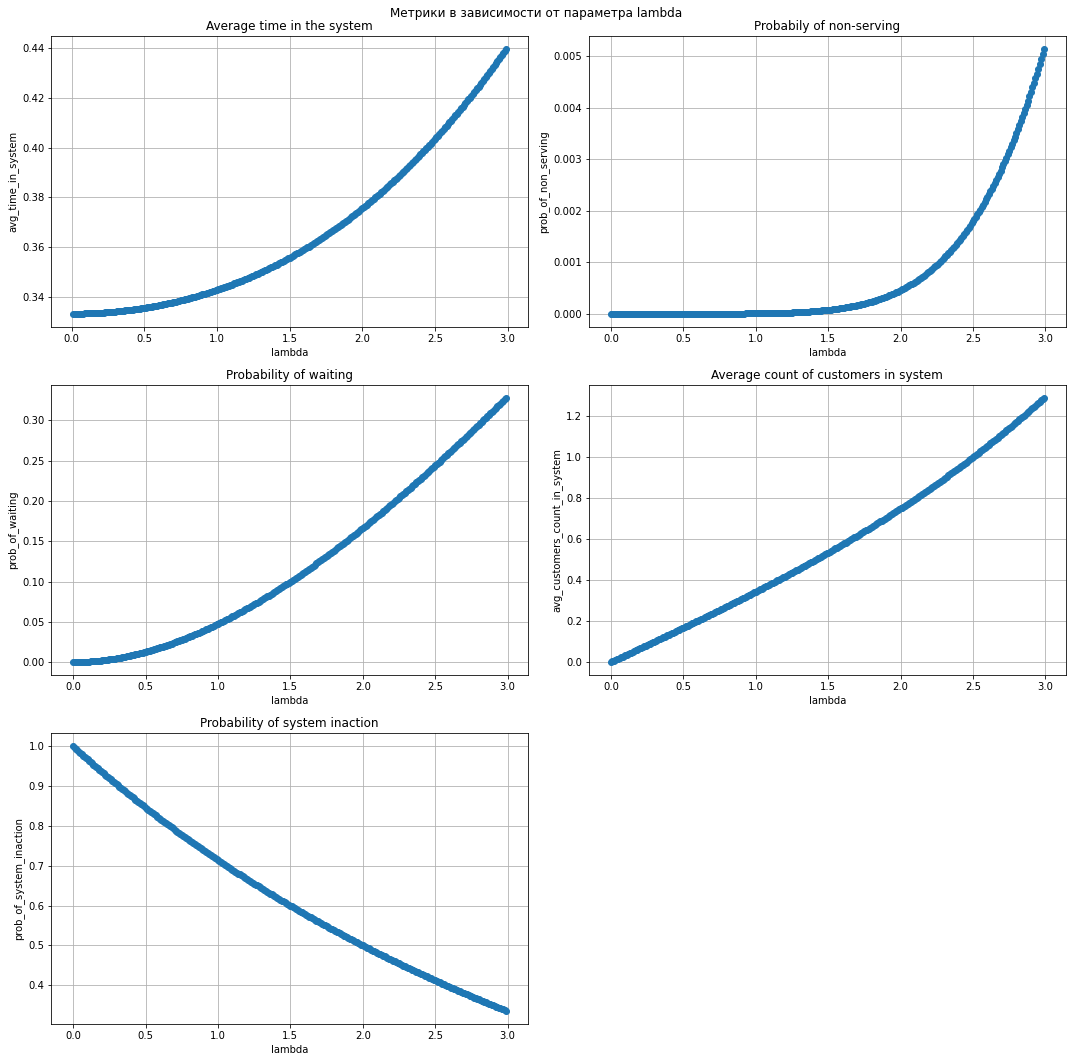

In [11]:
mu = 3
int_size = 0.01
lambdas = np.arange(0, mu, int_size)
capacity = 5

test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}
for i in range(len(lambdas)):
    test_metrics['prob_of_non_serving'].append(failure_probability(lambdas[i],mu,capacity))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(lambdas[i], mu, capacity))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(lambdas[i],mu,capacity))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(lambdas[i],mu,capacity))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(lambdas[i],mu,capacity))
    
draw_metrics(lambdas, test_metrics, 'lambda')

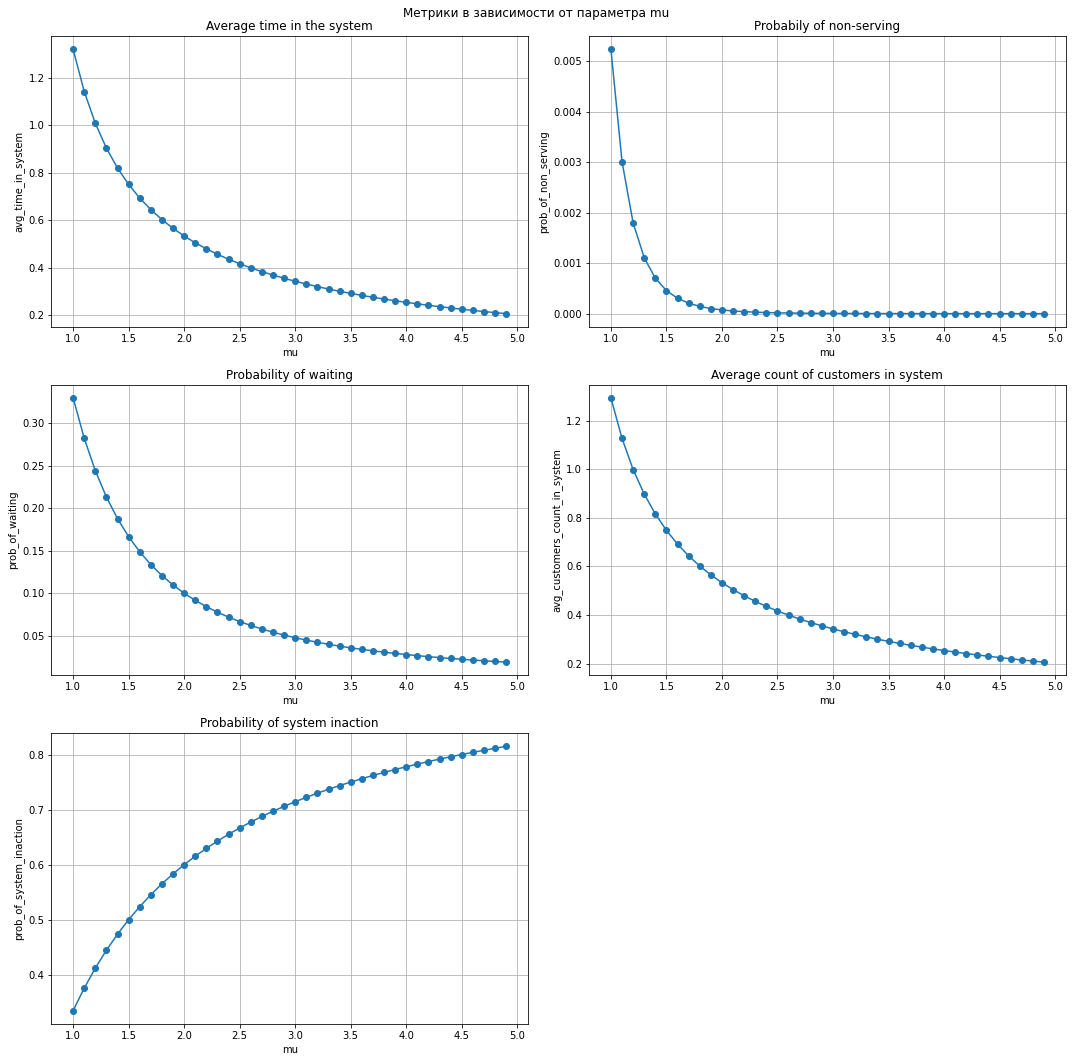

In [12]:
mu_array = np.arange(1, 5, 0.1)
lambdas = 1
capacity = 5

test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}
for mu in mu_array:
    test_metrics['prob_of_non_serving'].append(failure_probability(lambdas,mu,capacity))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(lambdas, mu, capacity))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(lambdas,mu,capacity))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(lambdas,mu,capacity))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(lambdas,mu,capacity))
draw_metrics(mu_array, test_metrics, 'mu')

<ipython-input-178-1175bccb95bc>:7: RuntimeWarning: overflow encountered in long_scalars
  return ((r**i)/(2*2**(i-2)) * p)
<ipython-input-178-1175bccb95bc>:7: RuntimeWarning: divide by zero encountered in double_scalars
  return ((r**i)/(2*2**(i-2)) * p)
<ipython-input-181-f1691ab30bee>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return p*(r+((r**2)*(-2*(N+3)*(r**(N+1))+(N+2)*(r**(N+2))-(2**(N+1))*r+(2**(N+3))))/(((r-2)**2)*(2**(N+1))))
<ipython-input-182-f786ae185762>:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1/(l*(1-get_pi(N, l, m, N))) * avg_number_requirements_in_system(l, m, N))


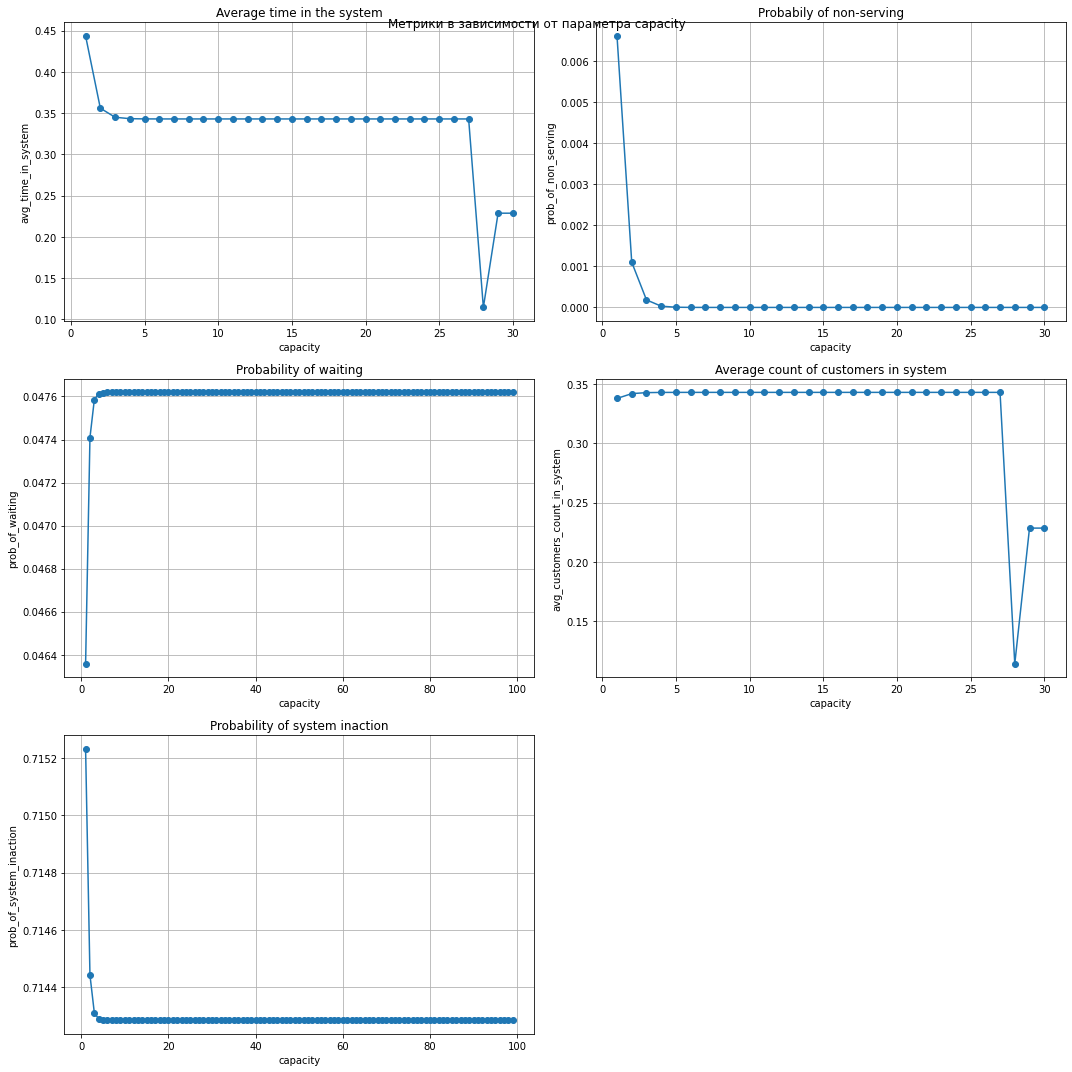

In [192]:
mu = 3
lambdas = 1
capacity = np.arange(1, 100)

test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}

for cap in capacity:
    test_metrics['prob_of_non_serving'].append(failure_probability(lambdas,mu,cap))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(lambdas, mu, cap))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(lambdas,mu,cap))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(lambdas,mu,cap))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(lambdas,mu,cap))
draw_metrics(capacity, test_metrics, 'capacity')

### лямбда больше mu

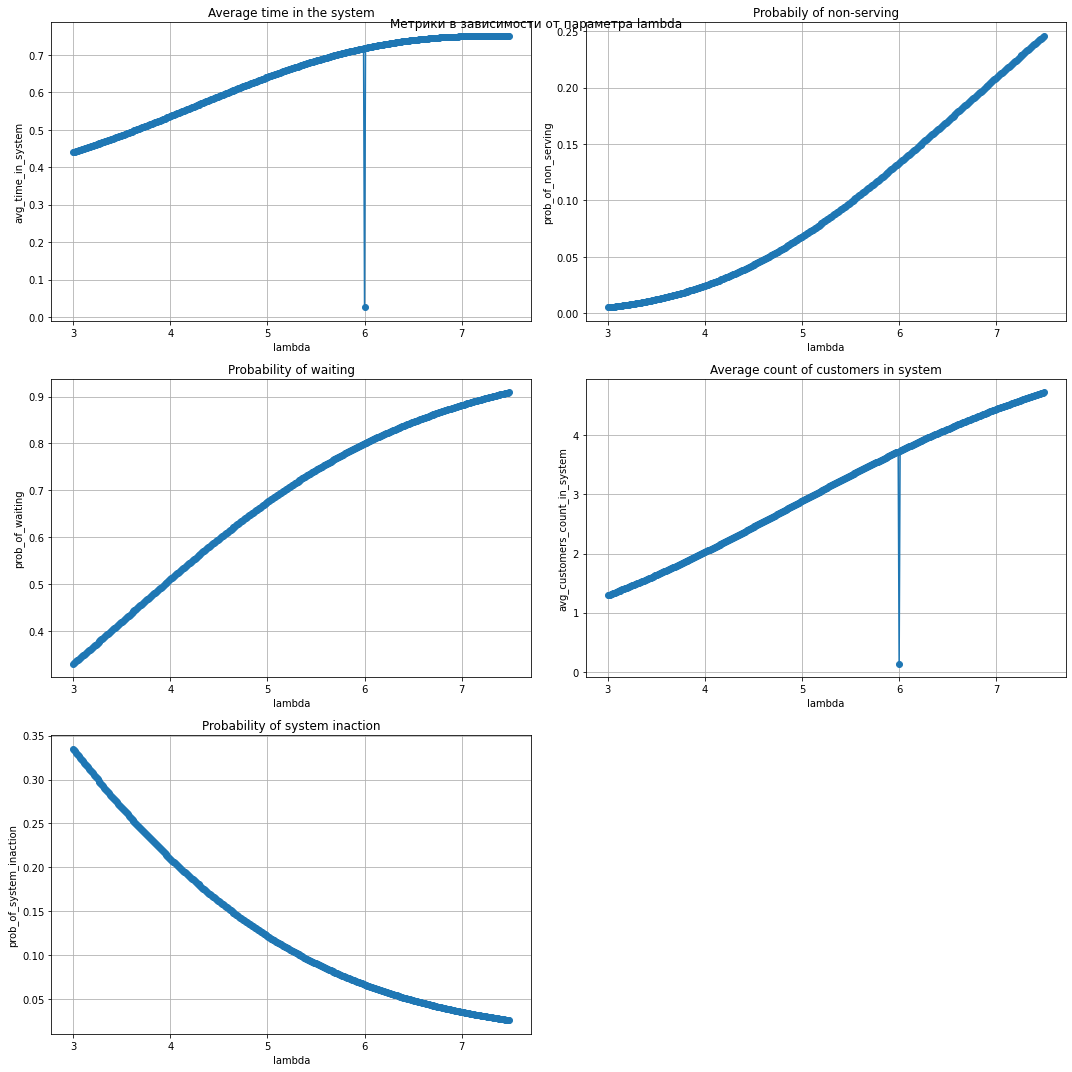

In [193]:
mu = 3
int_size = 0.01
lambdas = np.arange(mu, 5*mu/2, int_size)
capacity = 5

test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}
for i in range(len(lambdas)):
    test_metrics['prob_of_non_serving'].append(failure_probability(lambdas[i],mu,capacity))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(lambdas[i], mu, capacity))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(lambdas[i],mu,capacity))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(lambdas[i],mu,capacity))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(lambdas[i],mu,capacity))
draw_metrics(lambdas, test_metrics, 'lambda')

<ipython-input-178-1175bccb95bc>:3: RuntimeWarning: invalid value encountered in double_scalars
  p = (1+r+((r**2)/2 * (1-(r/2)**(N+1))/(1-(r/2))))**(-1)
<ipython-input-181-f1691ab30bee>:4: RuntimeWarning: invalid value encountered in double_scalars
  return p*(r+((r**2)*(-2*(N+3)*(r**(N+1))+(N+2)*(r**(N+2))-(2**(N+1))*r+(2**(N+3))))/(((r-2)**2)*(2**(N+1))))


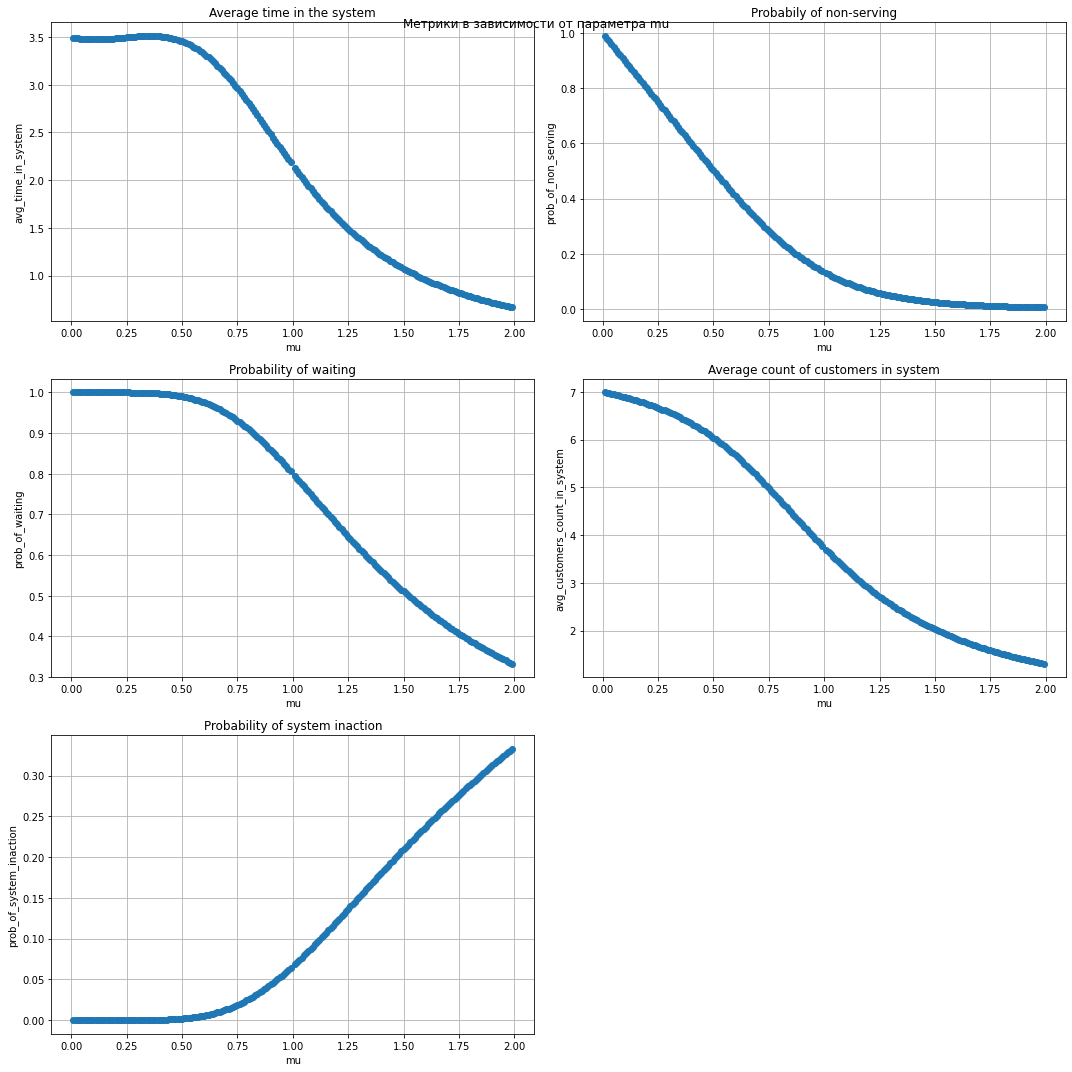

In [194]:
mu_array = np.arange(0.01, 2, 0.01)
int_size = 0.01
lambdas = 2
capacity = 5


test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}
for mu in mu_array:
    test_metrics['prob_of_non_serving'].append(failure_probability(lambdas,mu,capacity))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(lambdas, mu, capacity))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(lambdas,mu,capacity))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(lambdas,mu,capacity))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(lambdas,mu,capacity))
draw_metrics(mu_array, test_metrics, 'mu')